# DATA SCIENCE FINAL PROJECT

# The Battle of Neighborhoods

RADUL R DEV

<H3> INTRODUCTION</H3>

<B>London</B> is the capital and largest city of England and the United Kingdom.London has been a major settlement for two millennia.London is one of the world's most important global cities.London has a diverse range of people and cultures, and more than 300 languages are spoken in the region.London contains four World Heritage Sites.London encompasses a total area of 1,583 square kilometres (611 sq mi), an area which had a population of 7,172,036 in 2001 and a population density of 4,542 inhabitants per square kilometre (11,760/sq mi).

<B>Paris</B> is the capital and most populous city of France.Paris have estimated population of 2,148,271 residents as of 2020, in an area of 105 square kilometres.Paris was the second most expensive city in the world. It was ranked as the second most visited travel destination in the world in 2019.

<H3> BUISNESS PROBLEM</H3>

The aim is to help tourists choose their destinations depending on the experiences that the neighbourhoods have to offer and what they would want to have. This also helps people make decisions if they are thinking about migrating to London or Paris or even if they want to relocate neighbourhoods within the city. Our findings will help stakeholders make informed decisions and address any concerns they have including the different kinds of cuisines, provision stores and what the city has to offer.

<H3>DATA DESCRIPTION</H3>

Using Postal codes we use can find out the neighborhoods, boroughs, venues and their most popular venue categories.From the geographical locaton data and the properties we could sum up what cityies have to offer.

<b>London</b>

To derive our solution, We scrape our data from https://en.wikipedia.org/wiki/List_of_areas_of_London 
This wikipedia page has information about all the neighbourhoods, we limit it London. borough(Name of Neighbourhood), town(Name of borough), post_code(Postal codes for London).

<b>Paris</b>

To derive our solution, We leverage JSON data available at https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e
The JSON file has data about all the neighbourhoods in France, we limit it to Paris. postal_code(Postal codes for France), nom_comm(Name of Neighbourhoods in France), nom_dept(Name of the boroughs, equivalent to towns in France), geo_point_2d(Tuple containing the latitude and longitude of the Neighbourhoods).

<b>Foursquare API Data</b>


We will need data about different venues in different neighbourhoods of that specific borough. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighbourhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighbourhood. For each neighbourhood, we have chosen the radius to be 500 meters.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

Neighbourhood (Name of the Neighbourhood)
Neighbourhood Latitude(Latitude of the Neighbourhood)
Neighbourhood Longitude(Longitude of the Neighbourhood)
Venue(Name of the Venue)
Venue Latitude(Latitude of Venue)
Venue Longitude(Longitude of Venue)
Venue Category(Category of Venue)
Based on all the information collected for both London and Paris, we have sufficient data to build our model. We cluster the neighbourhoods together based on similar venue categories. We then present our observations and findings. Using this data, our stakeholders can take the necessary decision.

<h3>METHODOLOGY</h3>

Using different python libraries such as pandas, numpy, requests, matplotlib, folium, sklearn

The approach taken here is to explore each of the cities individually, plot the map to show the neighbourhoods being considered and then build our model by clustering all of the similar neighbourhoods together and finally plot the new map with the clustered neighbourhoods. We draw insights and then compare and discuss our findings.

<h3>DATA COLLECTON</h3>

In the data collection stage, we begin with collecting the required data for the cities of London and Paris. We need data that has the postal codes, neighbourhoods and boroughs specific to each of the cities.

To collect data for London, we scrape the List of areas of London wikipedia page to take the 2nd table using the following code:

url_london = "https://en.wikipedia.org/wiki/List_of_areas_of_London"

wiki_london_url = requests.get(url_london)

wiki_london_data = pd.read_html(wiki_london_url.text)

wiki_london_data = wiki_london_data[1]

wiki_london_data

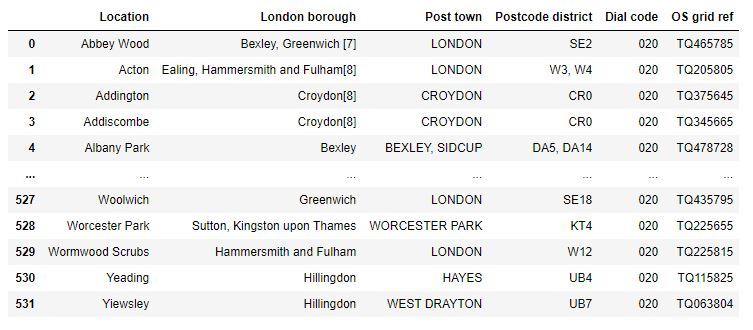

To collect data for Paris, we download the JSON file containg all the postal codes of France from https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e

Using Pandas we load the table after reading the JSON file:

!wget -q -O 'france-data.json' https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e

print("Data Downloaded!")

paris_raw = pd.read_json('france-data.json')

paris_raw.head()

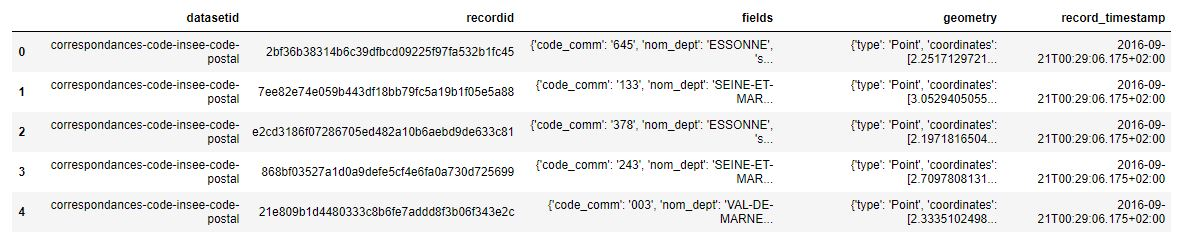

<H3>DATA PROCESSING</H3>

For London, We replace the spaces with underscores in the title.The borough column has numbers within square brackets that we remove using:



<H3>FEATURE SELECTION</H3>

For both of our datasets, we need only the borough, neighbourhood, postal codes and geolocations (latitude and longitude). So we end up selecting the columns that we need by:

df1 = wiki_london_data.drop( [ wiki_london_data.columns[0], wiki_london_data.columns[4], wiki_london_data.columns[5] ], axis=1)

df_2 = paris_field_data[['postal_code','nom_comm','nom_dept','geo_point_2d']]

<H3>FEATURE ENGINEERING</H3>


Both of our Datasets actually contain information related to all the cities in the country. We can narrow down and further process the data by selecting only the neighbourhoods pertaining to 'London' and 'Paris'


Looking over our London dataset, we can see that we don't have the geolocation data. We need to extrapolate the missing data for our neighbourhoods. We perform this by leveraging the ArcGIS API. With the Help of ArcGIS API we can get the latitude and longitude of our London neighbourhood data.

Defining London arcgis geocode function to return latitude and longitude

Passing postal codes of london to get the geographical co-ordinates

coordinates_latlng_uk = geo_coordinates_uk.apply(lambda x: get_x_y_uk(x))

We proceed with Merging our source data with the geographical co-ordinates to make our dataset ready for the next stage

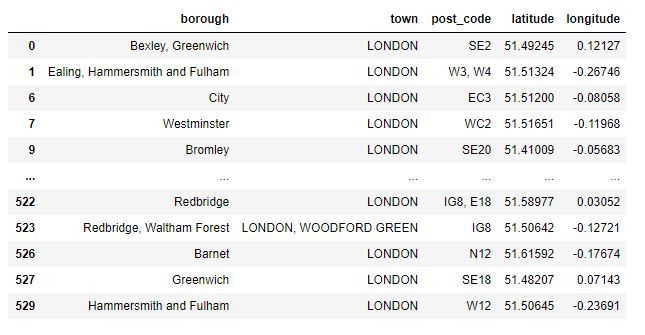


As for our Paris dataset, we don't need to get the geo coordinates using an external data source or collect it with the ArcGIS API call since we already have it stored in the geo_point_2d column as a tuple in the df_paris dataframe.

We just need to extract the latitude and longitude for the column:

We then create our Paris dataset with the required information:

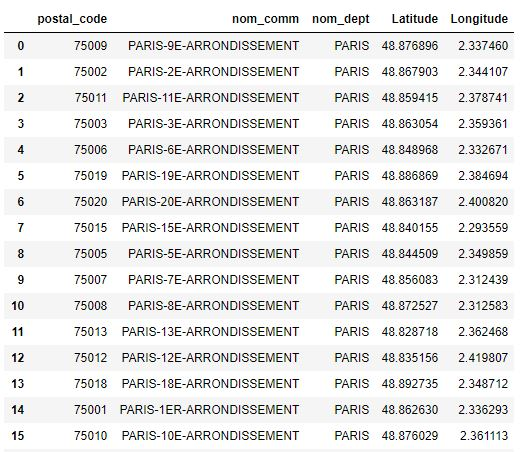

<h3>Visualizing the Neighbourhoods of London and Paris</h3>

link to notebook: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/615f6cf5-731f-486c-af98-f2a46f1efa26/view?access_token=77d7f4d4e97070c3dde6818d876c10a92d2138344eeac6870ff6921a5c8c703e

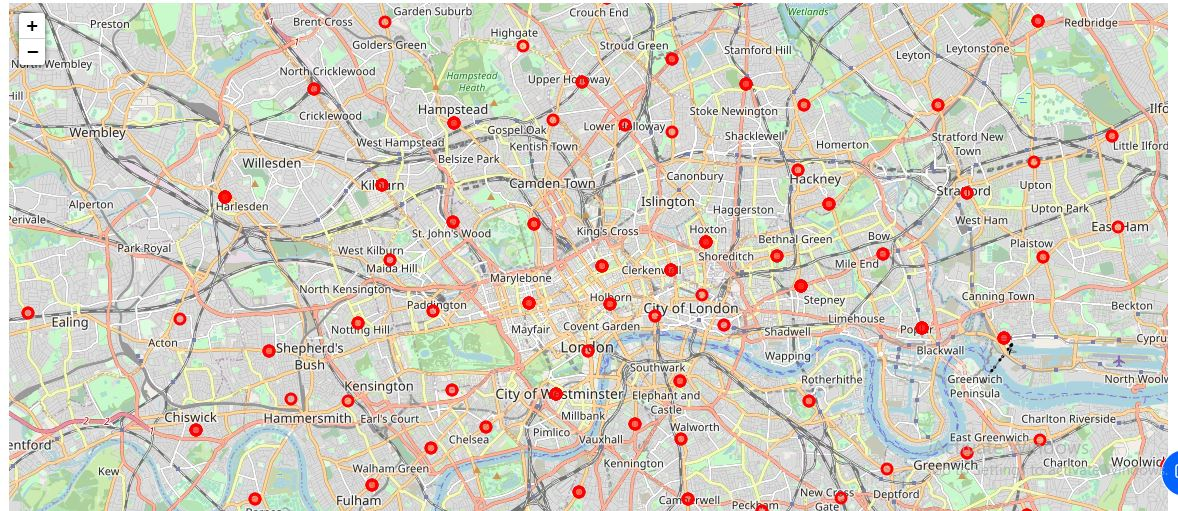

paris

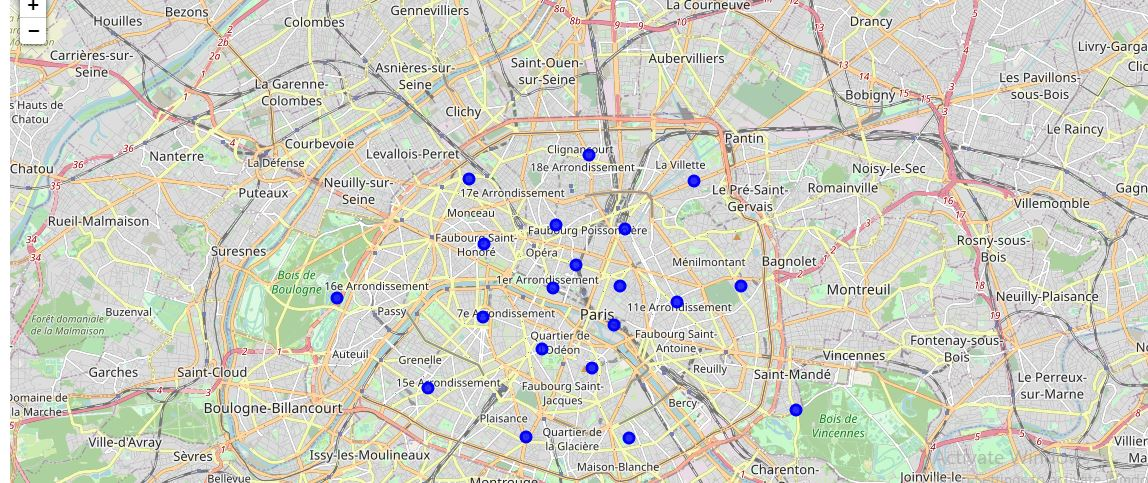

<h3>One Hot Encoding</h3>

Since we are trying to find out what are the different kinds of venue categories present in each neighbourhood and then calculate the top 10 common venues to base our similarity on, we use the One Hot Encoding to work with our categorical datatype of the venue categories. This helps to convert the categorical data into numeric data.

We won't be using label encoding in this situation since label encoding might cause our machine learning model to have a bias or a sort of ranking which we are trying to avoid by using One Hot Encoding.

We perform one hot encoding and then calculate the mean of the grouped venue categories for each of the neighbourhoods.

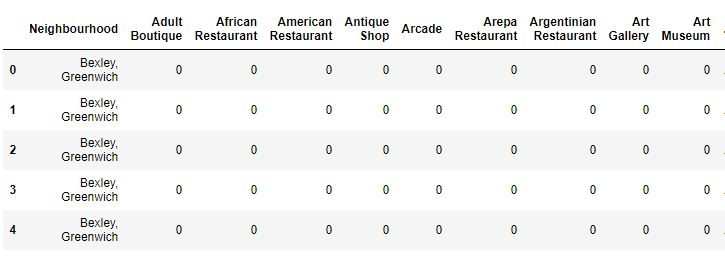

<h3>Top Venues in the Neighbourhoods</h3>

In our next step, We need to rank and label the top venue categories in our neighborhood.

Let's define a function to get the top venue categories in the neighbourhood

There are many categories, we will consider top 10 categories to avoid data skew.

Defining a function to label them accurately

Getting the top venue categories in the neighbourhoods of London

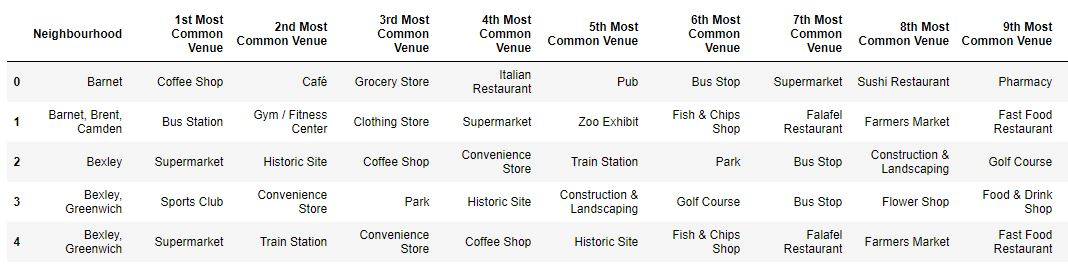

<h3>Model Building - KMeans</h3>

Moving on to the most exicitng part - Model Building! We will be using KMeans Clustering Machine learning algorithm to cluster similar neighbourhoods together. We will be going with the number of clusters as 5.

Our model has labelled each of the neighbourhoods, we add the label into our dataset.

We then join London_merged with our neighbourhood venues sorted to add latitude & longitude for each of the neighborhood to prepare it for visualization.

<h3>Visualizing the clustered Neighbourhoods</h3>

Our data is processed, missing data is collected and compiled. The Model is built. All that's remaining is to see the clustered neighbourhoods on the map. Again, we use Folium package to do so.

We drop all the NaN values to prevent data skew

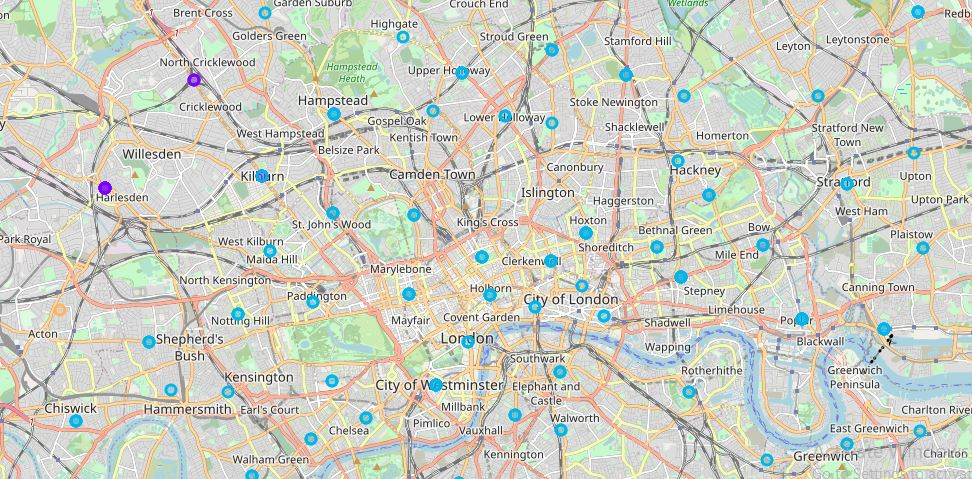

link to notebook: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/615f6cf5-731f-486c-af98-f2a46f1efa26/view?access_token=77d7f4d4e97070c3dde6818d876c10a92d2138344eeac6870ff6921a5c8c703e

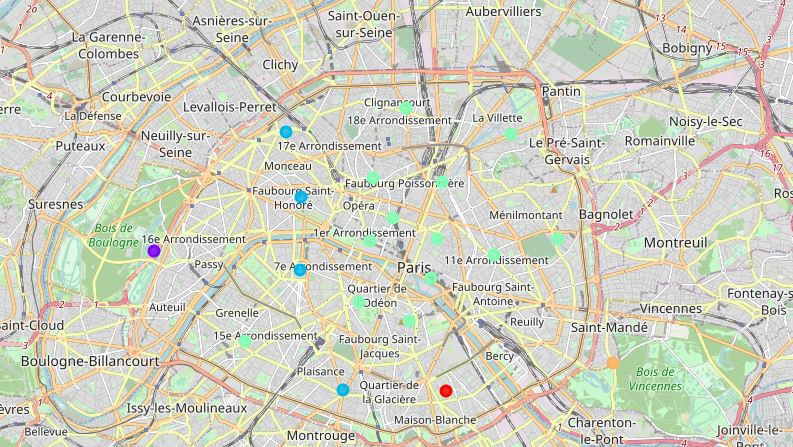

<h3>Examining our Clusters</h3>

Cluster 1

Cluster 2

Cluster 3

Cluster 4

Cluster 5

<h3>Results and Discussion</h3>

The neighbourhoods of London are very mulitcultural. There are a lot of different cusines including Indian, Italian, Turkish and Chinese. London seems to take a step further in this direction by having a lot of Restaurants, bars, juice bars, coffee shops, Fish and Chips shop and Breakfast spots. It has a lot of shopping options too with that of the Flea markets, flower shops, fish markets, Fishing stores, clothing stores. The main modes of transport seem to be Buses and trains. For leisure, the neighbourhoods are set up to have lots of parks, golf courses, zoo, gyms and Historic sites. Overall, the city of London offers a multicultural, diverse and certainly an entertaining experience.

Paris is relatively small in size geographically. It has a wide variety of cusines and eateries including French, Thai, Cambodian, Asian, Chinese etc. There are a lot of hangout spots including many Restaurants and Bars. Paris has a lot of Bistro's. Different means of public transport in Paris which includes buses, bikes, boats or ferries. For leisure and sight seeing, there are a lot of Plazas, Trails, Parks, Historic sites, clothing shops, Art galleries and Museums. Overall, Paris seems like the relaxing vacation spot with a mix of lakes, historic spots and a wide variety of cusines to try out.

<h3>Conclusion</h3>

The purpose of this project was to explore the cities of London and Paris and see how attractive it is to potential tourists and migrants. We explored both the cities based on their postal codes and then extrapolated the common venues present in each of the neighbourhoods finally concluding with clustering similar neighbourhoods together.

We could see that each of the neighbourhoods in both the cities have a wide variety of experiences to offer which is unique in it's own way. The cultural diversity is quite evident which also gives the feeling of a sense of inclusion.

Both Paris and London seem to offer a vacation stay or a romantic getaway with a lot of places to explore, beautiful landscapes, amazing food and a wide variety of culture. Overall, it's upto the stakeholders to decide which experience they would prefer more and which would more to their liking.